In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv('prices.csv', index_col=0)
new_symbols = data.symbol.unique()
new_df = pd.DataFrame(columns=new_symbols, index=data.index)
df_pivot = data.pivot(columns='symbol', values='close')
data = new_df.combine_first(df_pivot[new_symbols])
# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
data = data.astype(float)
(data.head())


,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,V,VZ,WFC,XOM,XRX,YHOO,GM,FB,KMI,HPE
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.3,16.650013,15.69,9.01,3.4,28.090001,16.969999,...,88.139999,33.279869,27.32,69.150002,8.63,17.1,NaN,NaN,NaN,NaN
2010-01-04,214.009998,54.459951,29.889999,14.3,16.650013,15.69,9.01,3.4,28.090001,16.969999,...,88.139999,33.279869,27.32,69.150002,8.63,17.1,NaN,NaN,NaN,NaN
2010-01-04,214.009998,54.459951,29.889999,14.3,16.650013,15.69,9.01,3.4,28.090001,16.969999,...,88.139999,33.279869,27.32,69.150002,8.63,17.1,NaN,NaN,NaN,NaN
2010-01-04,214.009998,54.459951,29.889999,14.3,16.650013,15.69,9.01,3.4,28.090001,16.969999,...,88.139999,33.279869,27.32,69.150002,8.63,17.1,NaN,NaN,NaN,NaN
2010-01-04,214.009998,54.459951,29.889999,14.3,16.650013,15.69,9.01,3.4,28.090001,16.969999,...,88.139999,33.279869,27.32,69.150002,8.63,17.1,NaN,NaN,NaN,NaN


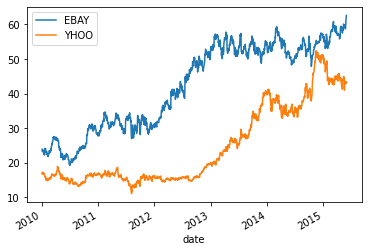

In [37]:
prices = data.loc[:'2015-06-01',['EBAY','YHOO']]
prices.plot()
plt.show()

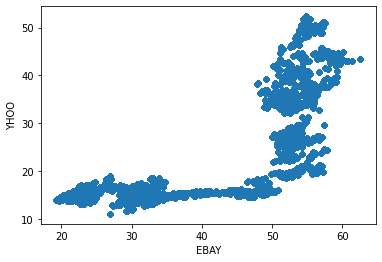

In [38]:
# Scatterplot with one company per axis
prices.plot.scatter("EBAY", "YHOO")
plt.show()

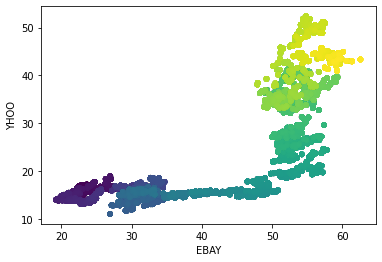

In [39]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index,
                   cmap=plt.cm.viridis, colorbar=False)
plt.show()

In [40]:
#ebay: "EBAY"
#nvidia: "NVDA"
#yahoo: "YHOO"
#apple: "AAPL"
#We'll use these columns to define the input/output arrays in our
#model.

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = data[['EBAY', 'NVDA', 'YHOO']]
y = data[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-2.79976525e-01 -5.94173891e-01 -3.60303697e+02]


In [41]:
X = np.array(X[:1775])
y = np.array(y[:1775])

In [42]:
X.shape


(1775, 3)

-0.579430332786621


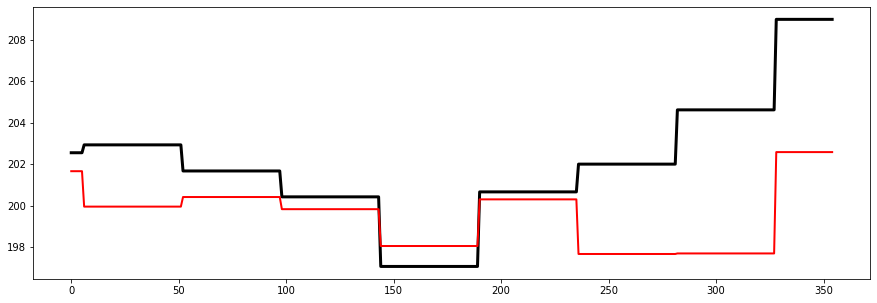

In [43]:
# Split our data into training and test sets
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
import sklearn.metrics as metrics
from sklearn.metrics import r2_score



# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

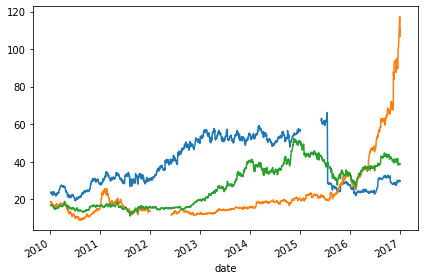

EBAY    5047
NVDA    4935
YHOO       0
dtype: int64


In [44]:
#The data has been loaded into a DataFrame called prices.
prices = data.loc[:'2017-06-01', ['EBAY', 'NVDA', 'YHOO']]
prices.loc['2015-01-01':'2015-06-01', ['EBAY']] = np.nan
prices.loc['2012-01-01':'2012-06-01', ['NVDA']] = np.nan
# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)
prices = prices.astype('float32')

In [45]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
   missing_values = prices.isna()

    # Interpolate the missing values
   prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
   fig, ax = plt.subplots(figsize=(10, 5))
   prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)

    # Now plot the interpolated values on top in red
   prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
   plt.show()

# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

ValueError: Expect x to not have duplicates

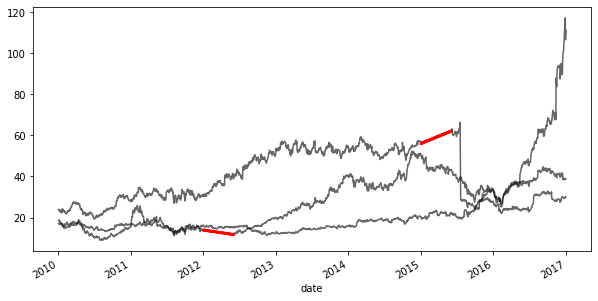

In [46]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

In [47]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

ValueError: Expect x to not have duplicates

C:\Users\JDAMOD~1\AppData\Local\Temp/ipykernel_16460/1820160090.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = series[-1]


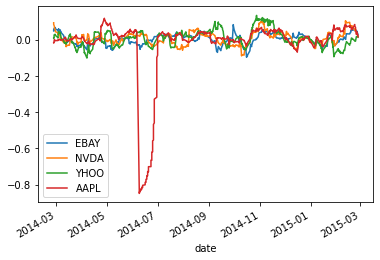

In [48]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
   previous_values = series[:-1]
   last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
   percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
   return percent_change

# Apply your custom function and plot
prices = data.loc['2014-02':'2015-02',['EBAY', 'NVDA', 'YHOO','AAPL']]
prices_perc = prices.rolling(800).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

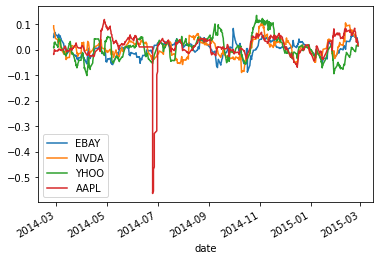

In [49]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
   absolute_differences_from_mean = np.abs(series - np.mean(series))

    # Calculate a mask for the differences that are > 3 standard deviations from the mean
   this_mask = absolute_differences_from_mean > (np.std(series) * 3)

    # Replace these values with the median accross the data
   series[this_mask] = np.nanmedian(series)
   return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

In [59]:
prices_perc = data.loc['2010-02':'2011-02',['EBAY', 'YHOO',]]

C:\Users\JDAMOD~1\AppData\Local\Temp/ipykernel_16460/3687674152.py:8: FutureWarning: The provided callable <function min at 0x000002897E961CF0> is currently using Rolling.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
C:\Users\JDAMOD~1\AppData\Local\Temp/ipykernel_16460/3687674152.py:8: FutureWarning: The provided callable <function max at 0x000002897E961BD0> is currently using Rolling.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
C:\Users\JDAMOD~1\AppData\Local\Temp/ipykernel_16460/3687674152.py:8: FutureWarning: The provided callable <function mean at 0x000002897E9624D0> is currently using Rolling.mean. In a future version of pandas, the provided callable will be used directly

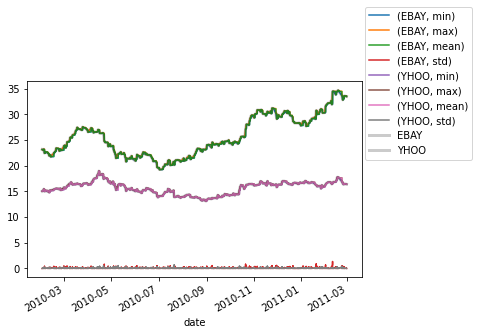

In [60]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(10, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2015-01"].plot()
prices_perc.loc[:"2015-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

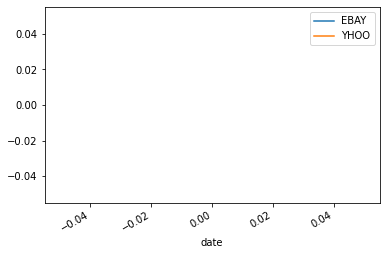

In [62]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))

    # Calculate a mask for the differences that are > 3 standard deviations from the mean
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

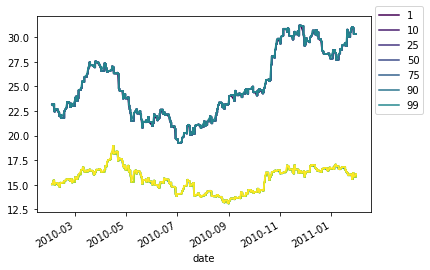

In [61]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

In [66]:

# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
# prices_perc['week_of_year'] = prices_perc.index.
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

                 EBAY   YHOO  day_of_week  month_of_year  week_of_year
date                                                                  
2010-02-01  23.169999  15.05            0              2             0
2010-02-01  23.169999  15.05            0              2             0
2010-02-01  23.169999  15.05            0              2             0
2010-02-01  23.169999  15.05            0              2             0
2010-02-01  23.169999  15.05            0              2             0
...               ...    ...          ...            ...           ...
2011-02-28  33.510000  16.40            0              2             0
2011-02-28  33.510000  16.40            0              2             0
2011-02-28  33.510000  16.40            0              2             0
2011-02-28  33.510000  16.40            0              2             0
2011-02-28  33.510000  16.40            0              2             0

[12581 rows x 5 columns]
